In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
from datetime import date, timedelta

In [2]:
tkr = yf.Ticker('AAPL')
apple_df = tkr.history(period='1y')  # Returns dataframe of Apple 

In [3]:
apple_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-07 00:00:00-05:00,192.686027,194.049343,192.646214,193.322906,47477700,0.0,0.0
2023-12-08 00:00:00-05:00,193.253227,195.034508,192.725812,194.755875,53377300,0.0,0.0
2023-12-11 00:00:00-05:00,192.168569,192.546722,190.486806,192.238220,60943700,0.0,0.0
2023-12-12 00:00:00-05:00,192.138714,193.770718,190.785344,193.760773,52696900,0.0,0.0
2023-12-13 00:00:00-05:00,194.138900,197.034717,193.900080,196.994919,70404200,0.0,0.0


In [4]:
apple_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

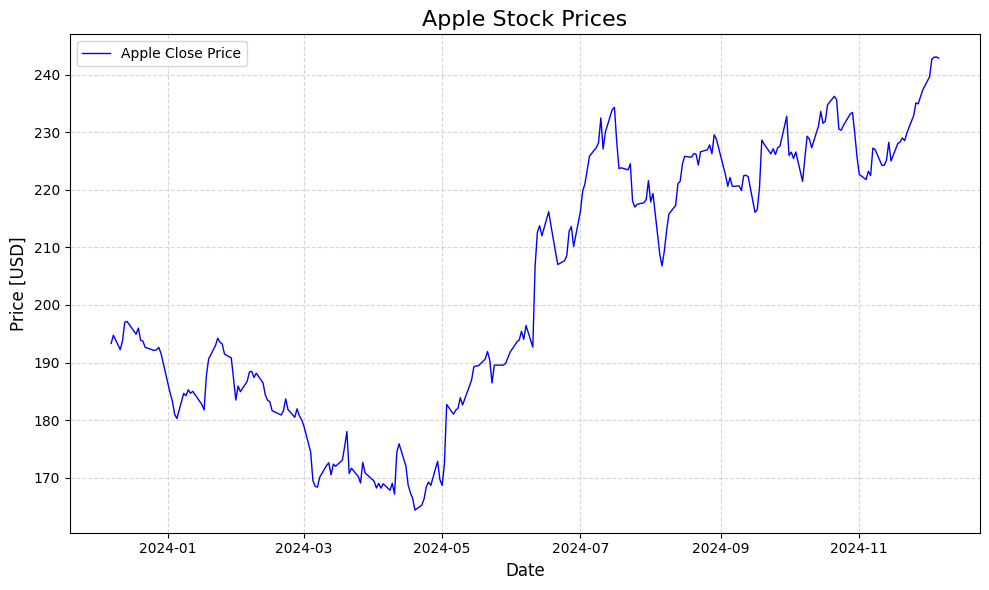

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(apple_df.index, apple_df['Close'], label='Apple Close Price', color='blue', linewidth=1)
plt.title('Apple Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price [USD]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show

In [6]:
end = date.today()
start = end - timedelta(days=365)
sp500_df = pdr.get_data_stooq('^SPX', start, end)  # Returns dataframe of S&P500 index

In [7]:
sp500_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-06,6081.38,6099.97,6079.98,6090.27,2517852420
2024-12-05,6089.03,6094.55,6072.90,6075.11,2675005481
2024-12-04,6069.39,6089.84,6061.06,6086.49,2712321623
2024-12-03,6042.97,6052.07,6033.39,6049.88,2655568059
2024-12-02,6040.11,6053.58,6035.33,6047.15,2758054562


<function matplotlib.pyplot.show(close=None, block=None)>

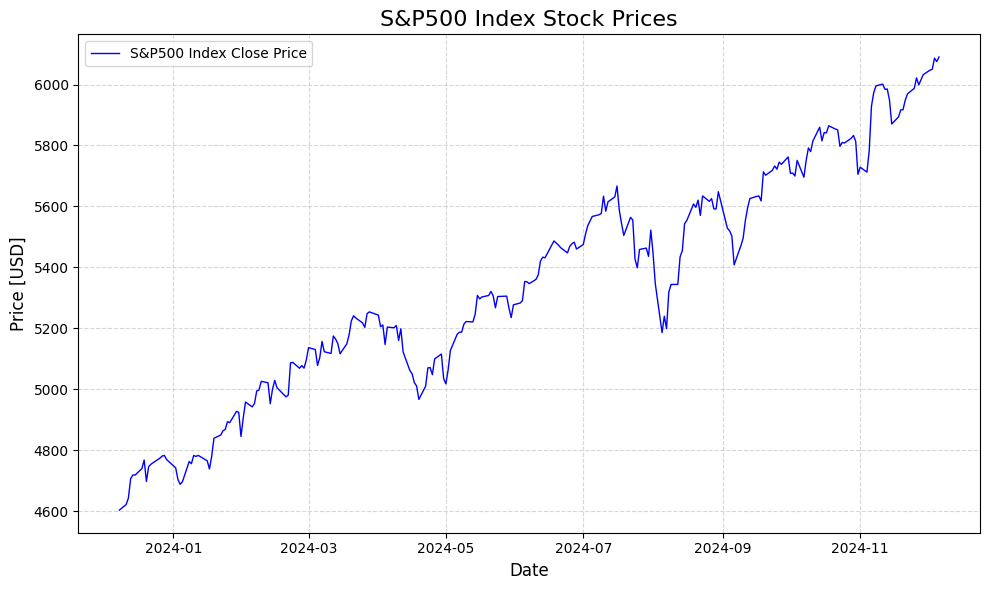

In [16]:
plt.figure(figsize = (10, 6))
plt.plot(sp500_df.index, sp500_df['Close'], label='S&P500 Index Close Price', color='blue', linewidth=1)
plt.title('S&P500 Index Stock Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price [USD]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show

In [8]:
apple_df.index = apple_df.index.tz_localize(None)  # Removes time zone from Apple dataframe
sp500_df.index = sp500_df.index.tz_localize(None)  # Removes time zone from SP500 dataframe
df = apple_df.join(sp500_df, rsuffix='_idx')

In [9]:
df = df[['Close', 'Volume', 'Close_idx', 'Volume_idx']]
df.head()

,Close,Volume,Close_idx,Volume_idx
Date,,,,
2023-12-07,193.322906,47477700,NaN,NaN
2023-12-08,194.755875,53377300,4604.37,2.333925e+09
2023-12-11,192.238220,60943700,4622.44,2.434163e+09
2023-12-12,193.760773,52696900,4643.70,2.365341e+09
2023-12-13,196.994919,70404200,4707.09,3.014961e+09


<function matplotlib.pyplot.show(close=None, block=None)>

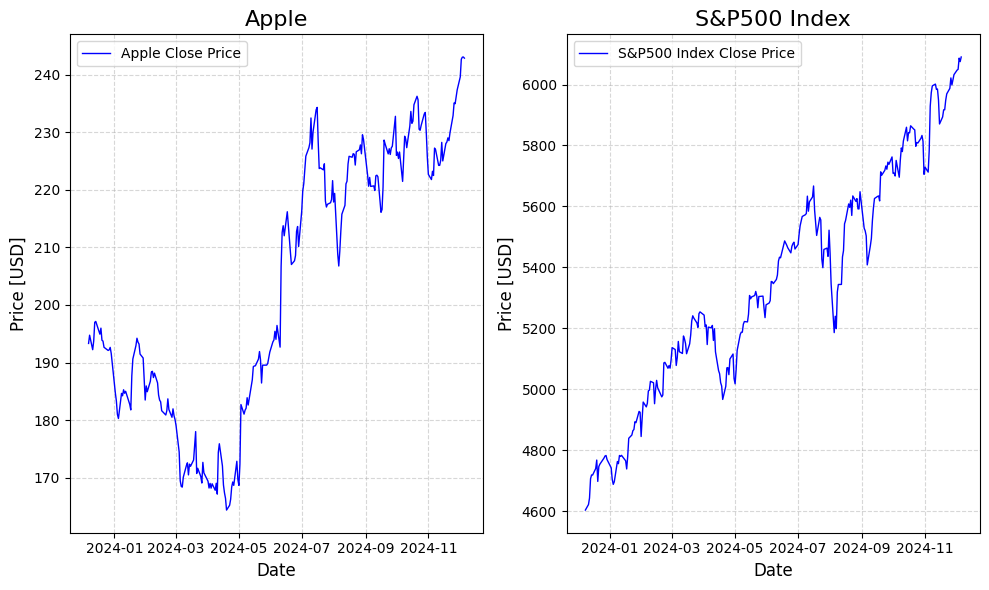

In [22]:
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['Close'], label='Apple Close Price', color='blue', linewidth=1)
plt.title('Apple', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price [USD]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(df.index, df['Close_idx'], label='S&P500 Index Close Price', color='blue', linewidth=1)
plt.title('S&P500 Index', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price [USD]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show